In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl

%matplotlib inline

In [33]:
a= 'C:\\Users\\HP\\Desktop\\My_Data_set_files\\cancer.csv'
df= pd.read_csv(a)
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1
679,0,2,1,1,1,2,1,1,1,1
680,1,5,10,10,3,7,3,8,10,2
681,1,4,8,6,4,3,4,10,6,1


In [34]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [35]:
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [36]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

# Data Visualization

<AxesSubplot:title={'center':'Graph of Menopause against age'}, xlabel='menopause', ylabel='age'>

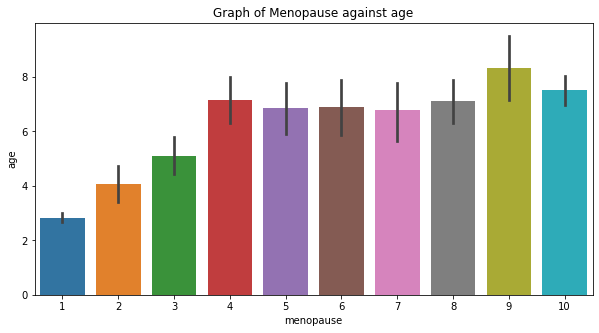

In [37]:
plt.figure(figsize= (10,5))
plt.title('Graph of Menopause against age')
sns.barplot(x= df['menopause'], y= df['age'])

<AxesSubplot:title={'center':'Menopause countplot'}, xlabel='menopause', ylabel='count'>

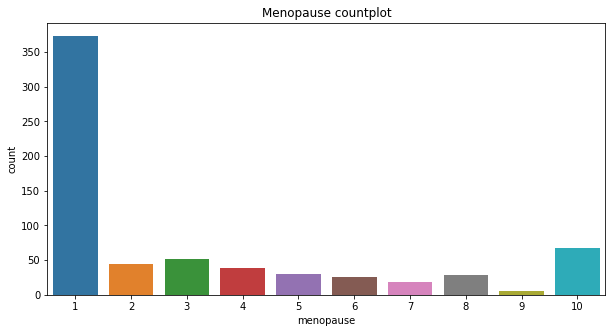

In [38]:
plt.figure(figsize= (10,5))
plt.title('Menopause countplot')
sns.countplot(x= df['menopause'], data= df)

<AxesSubplot:title={'center':'Graph of Menopause against age'}, xlabel='menopause', ylabel='Class'>

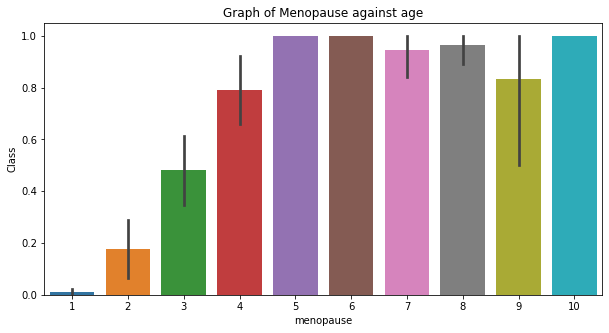

In [39]:
plt.figure(figsize= (10,5))
plt.title('Graph of Menopause against age')
sns.barplot(x= df['menopause'], y= df['Class'])

# Feature Engineering

In [40]:
df.dropna()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1
679,0,2,1,1,1,2,1,1,1,1
680,1,5,10,10,3,7,3,8,10,2
681,1,4,8,6,4,3,4,10,6,1


In [41]:
X= df.drop(['Class'], axis=1)
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [42]:
y= df['Class']
y

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64

# Machine LEarning Modelling

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 101, test_size= 0.2)

In [44]:
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()
lgr.fit(X_train, y_train)
lgr.score(X_test, y_test)

0.9854014598540146

In [45]:
pre1= lgr.predict(X_test)
pre1

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
clr= classification_report(pre1, y_test)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        97
           1       0.95      1.00      0.98        40

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.9635036496350365

In [48]:
pre2= dtree.predict(X_test)
pre2

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0], dtype=int64)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
clr= classification_report(pre2, y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.93      0.95      0.94        41

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



# Using another algorithm for better accuracy

In [50]:
from sklearn.ensemble import RandomForestClassifier
rdm= RandomForestClassifier()
rdm.fit(X_train, y_train)
rdm.score(X_test, y_test)

0.9854014598540146

In [51]:
pre3= rdm.predict(X_test)
pre3

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0], dtype=int64)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
clr= classification_report(pre3, y_test)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        97
           1       0.95      1.00      0.98        40

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=  KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9927007299270073

In [54]:
pre4= knn.predict(X_test)
pre4

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0], dtype=int64)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clr= classification_report(pre4, y_test)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.98      1.00      0.99        41

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



In [56]:
lgr_acc= accuracy_score(y_test, pre1)
lgr_acc*100

98.54014598540147

In [57]:
dtree_acc= accuracy_score(y_test, pre2)
dtree_acc*100

96.35036496350365

In [58]:
rdm_acc= accuracy_score(y_test, pre3)
rdm_acc*100

98.54014598540147

In [59]:
knn_acc= accuracy_score(y_test, pre4)
knn_acc*100

99.27007299270073

# Comparing the algorithm and their accuracy

In [60]:
model_accuracy= {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNneighbours'], 'Accuracy': [lgr_acc, dtree_acc, rdm_acc, knn_acc]}
model_accuracy

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  'KNneighbours'],
 'Accuracy': [0.9854014598540146,
  0.9635036496350365,
  0.9854014598540146,
  0.9927007299270073]}

In [61]:
df3= pd.DataFrame(model_accuracy)
df3

,Model,Accuracy
0,Logistic Regression,0.985401
1,Decision Tree,0.963504
2,Random Forest,0.985401
3,KNneighbours,0.992701


# Saving as pickle

In [62]:
with open('cancer_detector_model.pkl', 'wb') as file:
    pkl.dump(knn, file)